In [7]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

%matplotlib inline

# Introduction

We will use Pytorch to do solve 101 Deep learning problems.

These excercies will focus on the use of Pytorch to define, train and use neural networks.

# Neural network achitecture

The first step is to define some neural network architecture.

In Pytorch we use the `Module` class.
Basically a `Module` is a block that can do *forward* and *backward* propagation.
Every part of a neural network is a `Module`.

You can define a custom `Module` subclass by combining already existing modules and functions.
To do so you have to initialize the sublayer if needed and define the `forward()` method.

Example :


In [8]:
class RectifiedSigmoidLayer(nn.Module):
    def __init__(self, D_in, D_out):
        super().__init__()
        self.fc = nn.Linear(D_in, D_out)
    
    def forward(self, x):
        x = self.fc(x)
        x = F.relu(x)
        x = F.sigmoid(x)
        return x

#  Use GPU for your computations

Using GPUs for Deep Learning allows to accelerate your computations: As most of the computations are matrix-based operations, they are heavily parallelizable. In PyTorch, using Nvidia GPUs comes in 3 steps:

1. Send your model to the GPU
2. Send your data to the GPU
3. Perform your computations as usual
4. (Optional) Retrieve the results to the CPU.

Performing these operations is actually easy:
```python
device = "cuda:0"  
# for the first GPU, and 'cpu' for the CPU, making the code very architechture independent.

#1. 
model = nn.Linear(50,1)
model = model.to(device)

#2.
data = torch.randn(500,50)
data = data.to(device)

#3. Forward pass here.
output = model(data)

#4.
output_cpu = output.cpu().numpy() # + conversion to numpy array.
```

## Exercice 1 : Play with number of layer and neurons

A neural network is also a `Module` since we can do forward and backward propagation on it.

Complex neural network structures are often built with smaller repetitive blocks. 
Let's practice building those blocks.

For all these question the input and output dimension are user-defined. The non-linearities should be ReLU.

1. Define a 3 layers fully connected neural network with 40 neurons in each layer. 
2. Same as previous question but with a *n*-layers neural network (*n* is given by user). Astuce `nn.ModuleList` or `nn.ModuleDict`
3. Define a *n*-layer fully connected network in which the number of neuron start at *k* and double at each layer.
4. Define a *n*-layer fully connected network in which the number of neuron start at *k* and is divided by 2 at each layer.
5. Define a fully connected network for which the number of neurons for each layer is given as a list. 



In [9]:
class Exo1Q1(nn.Module):
    """Define a 3 layers fuœlly connected neural network with 40 neurons in each layer."""
    def __init__(self, D_in, D_out):
        super().__init__()
        self.fc1 = nn.Linear(D_in, 40)
        self.fc2 = nn.Linear(40, 40)
        self.fc3 = nn.Linear(40, D_out)
    
    def forward(self, x):
        x = self.fc1(x).clamp(min=0)
        x = self.fc2(x).clamp(min=0)
        x = self.fc3(x).clamp(min=0)
        return x

In [10]:
print(Exo1Q1(18, 2))

Exo1Q1(
  (fc1): Linear(in_features=18, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=2, bias=True)
)


In [11]:
class Exo1Q2(nn.Module):
    """Same as previous question but with a n-layers neural network (n is given by user)"""
    def __init__(self, D_in, D_out, n_layer):
        super().__init__()
        in_dims =  [D_in] + [40] * n_layer
        out_dims =  [40] * n_layer + [D_out]
        self.fc_list = nn.ModuleList([nn.Linear(in_dim, out_dim) for in_dim, out_dim in zip(in_dims, out_dims) ])
    
    def forward(self, x):
        for fc in self.fc_list:
            x = fc(x).clamp(min=0)
        return x

In [12]:
print(Exo1Q2(18, 2, 5))

Exo1Q2(
  (fc_list): ModuleList(
    (0): Linear(in_features=18, out_features=40, bias=True)
    (1): Linear(in_features=40, out_features=40, bias=True)
    (2): Linear(in_features=40, out_features=40, bias=True)
    (3): Linear(in_features=40, out_features=40, bias=True)
    (4): Linear(in_features=40, out_features=40, bias=True)
    (5): Linear(in_features=40, out_features=2, bias=True)
  )
)


In [13]:
class Exo1Q3(nn.Module):
    """Define a n-layer fully connected network in which the number of neuron start at k and double at each layer."""
    def __init__(self, D_in, D_out, k, n_layer):
        super().__init__()
        in_dims =  [D_in] + [(2**i)*k for i in range(n_layer)]
        out_dims =  [(2**i)*k for i in range(n_layer)] + [D_out]
        self.fc_list = nn.ModuleList([nn.Linear(in_dim, out_dim) for in_dim, out_dim in zip(in_dims, out_dims) ])
    
    def forward(self, x):
        for fc in self.fc_list:
            x = fc(x).clamp(min=0)
        return x

In [14]:
print(Exo1Q3(18, 3, 5, 5))

Exo1Q3(
  (fc_list): ModuleList(
    (0): Linear(in_features=18, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=40, bias=True)
    (4): Linear(in_features=40, out_features=80, bias=True)
    (5): Linear(in_features=80, out_features=3, bias=True)
  )
)


In [15]:
class Exo1Q4(nn.Module):
    """Define a n-layer fully connected network in which the number of neuron start at k
    and is divided by 2 at each layer."""
    def __init__(self, D_in, D_out, k, n_layer):
        super().__init__()
        in_dims =  [D_in] + [k//(2**i) for i in range(n_layer)]
        out_dims =  [k//(2**i) for i in range(n_layer)] + [D_out]
        self.fc_list = nn.ModuleList([nn.Linear(in_dim, out_dim) for in_dim, out_dim in zip(in_dims, out_dims) ])
    
    def forward(self, x):
        for fc in self.fc_list:
            x = fc(x).clamp(min=0)
        return x

In [16]:
print(Exo1Q4(38, 3, 80, 5))

Exo1Q4(
  (fc_list): ModuleList(
    (0): Linear(in_features=38, out_features=80, bias=True)
    (1): Linear(in_features=80, out_features=40, bias=True)
    (2): Linear(in_features=40, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=10, bias=True)
    (4): Linear(in_features=10, out_features=5, bias=True)
    (5): Linear(in_features=5, out_features=3, bias=True)
  )
)


In [17]:
class Exo1Q5(nn.Module):
    """Define a fully connected network for which the number of neurons for each layer is given as a list"""
    def __init__(self, D_in, D_out, n_neurons):
        super().__init__()
        in_dims =  [D_in] + n_neurons
        out_dims =  n_neurons + [D_out]
        self.fc_list = nn.ModuleList([nn.Linear(in_dim, out_dim) for in_dim, out_dim in zip(in_dims, out_dims) ])
    
    def forward(self, x):
        for fc in self.fc_list:
            x = fc(x).clamp(min=0)
        return x

In [18]:
print(Exo1Q5(30, 4, [5, 7, 8]))

Exo1Q5(
  (fc_list): ModuleList(
    (0): Linear(in_features=30, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=7, bias=True)
    (2): Linear(in_features=7, out_features=8, bias=True)
    (3): Linear(in_features=8, out_features=4, bias=True)
  )
)


## Convolutionnal layers

When the input features have some spatial structure as in images (nearby pixels) or in sound or text (nearby letter/word) the use of convolution layer is relevant to extract local structure.

With convolution layer the output shape depend on the input shape. See https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d for documentation.

Moreover convolution layer are almost always followed by some dimension reduction with max pooling or average pooling.

We can use convolution in the same way as fully connected. See example :

In [19]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [20]:
print(ConvNet())

ConvNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


## Exercice 2 : draw me a sheep

1. Draw a diagram of the previously defined ConvNet. The diagram should show each operation (conv layer, dense layer, max pooling, non-linearity, dropout, etc) applied to the input.


## Exercice 3 : More complex structure

Most neural networks are sequential neural networks but it is just as easy to build more complex structure.

Using the forward() method define the following structures :

1. A simple addition ![First structure](exo3Q1.png "Simple add")
2. Shorcuts can help training (see *deep residual learning*) ![Second structure](exo3Q2.png "Shortcuts")
3. You want to go crazy ? Reimplement some of the [Inception modules](https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202) 


In [21]:
class Exo3Q1(nn.Module):
    """Define a fully connected network for which the number of neurons for each layer is given as a list"""
    def __init__(self, D_in, D_out):
        super().__init__()
        self.fc1a = nn.Linear(D_in, 15)
        self.fc2a = nn.Linear(15, 23)

        self.fc1b = nn.Linear(D_in, 6)
        self.fc2b = nn.Linear(6, 23)
        
        self.fc3 = nn.Linear(23, 18)
        self.fc4 = nn.Linear(10, D_out)

    def forward(self, x):
        x1 = self.fc1a(x).clamp(min=0)
        x1 = self.fc2a(x1).clamp(min=0)
        
        x2 = F.sigmoid(self.fc1b(x))
        x2 = F.sigmoid(self.fc2b(x2))
        
        x = self.fc3(x1+x2).clamp(min=0)
        x = self.fc4(x)
        return x

In [22]:
class Exo3Q2a(nn.Module):
    """Define a fully connected network for which the number of neurons for each layer is given as a list"""
    def __init__(self, D_in, D_out):
        super().__init__()
        self.fc1 = nn.Linear(D_in, 15)
        self.fc2 = nn.Linear(15, 23)
        self.fc3 = nn.Linear(23, 15)
        self.fc4 = nn.Linear(15, 23)
        self.fc5 = nn.Linear(23, 18)
        self.fc6 = nn.Linear(18, 10)

    def forward(self, x):
        x1 = self.fc1(x).clamp(min=0)
        x = (x + self.fc2(x1)).clamp(min=0)
        x1 = self.fc3(x).clamp(min=0)
        x = (x + self.fc4(x1)).clamp(min=0)
        x = self.fc5(x).clamp(min=0)
        x = self.fc6(x)
        return x

In [23]:
class Exo3Q2SubBlock(nn.Module):
    def __init__(self, D_in, D_out):
        self.fc1 = nn.Linear(D_in, 15)
        self.fc2 = nn.Linear(15, D_out)

    def forward(self, x):
        x1 = self.fc1(x).clamp(min=0)
        x = (x + self.fc2(x1)).clamp(min=0)

        
class Exo3Q2b(nn.Module):
    """Define a fully connected network for which the number of neurons for each layer is given as a list"""
    def __init__(self, D_in, D_out):
        super().__init__()
        self.shortcut1 = Exo3Q2SubBlock(D_in, 23)
        self.shortcut2 = Exo3Q2SubBlock(23, 23)
        self.fc5 = nn.Linear(23, 18)
        self.fc6 = nn.Linear(18, 10)

    def forward(self, x):
        x = self.shortcut1(x)
        x = self.shortcut2(x)
        x = self.fc5(x).clamp(min=0)
        x = self.fc6(x)
        return x

# MNIST

The "hello world" of Machine Learning.

The MNIST dataset contains 70k 28x28 grayscale images of handwritten digits "0123456789".
The name of the game is to automatically recognize the digit from the image.

Once the neural network architecture is defined one should focus on training it to some task.
Here it will be classification.

In [24]:
from mydata.mnist import load_mnist

X, y = load_mnist()

Done.


Some examples

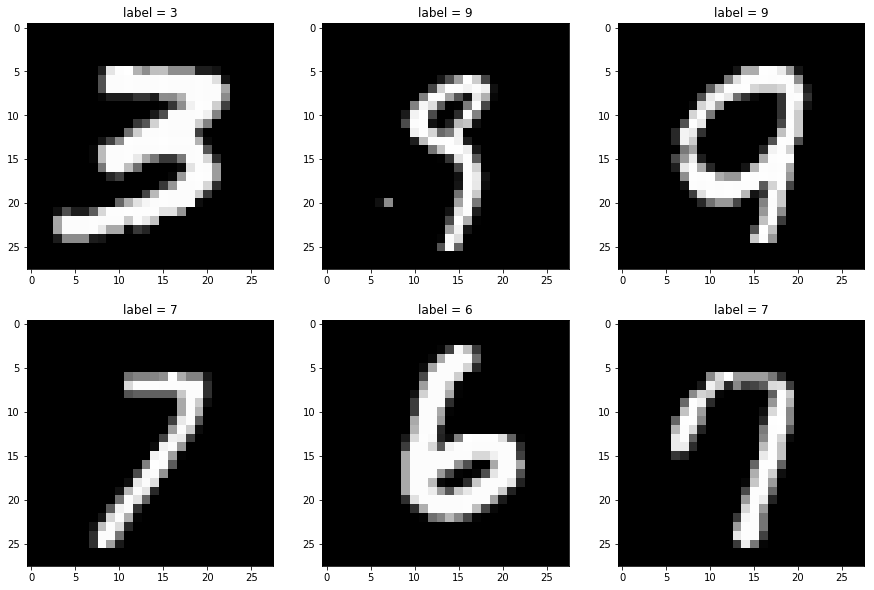

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

n_sample = X.shape[0]
for ax in np.ravel(axes):
    i = np.random.randint(0, n_sample)
    img = X[i].reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.set_title("label = {}".format(y[i]))

## Helper functions

Here is a bunch of function that will ease data handling.


First, we will need to feed the neural network with small batch of the training data.
Mini-batch gradient descent is the best way to optimize models and has been unchallenged for quite some time now.

We define here some functions to shuffle and split some arrays and yield them as small bunch.

*epoch_shuffle()* that will produce minibatch of the given arrays and reshuffle the data when it finishes an epoch. This means *epoch_shuffle()* will never stop sending minibatches !

This :
```python
for x in epoch_shuffle(data):
    do stuff
```
IS INFINITE LOOP



*one_epoch()*  will not shuffle the data and will stop once all the samples has been returned one time.


In [27]:
def assert_arrays_have_same_shape(*arrays):
    length = arrays[0].shape[0]
    # Assert that every array have the same 1st dimension length:
    for i, arr in enumerate(arrays):
        assert arr.shape[0] == length, "Every array should have the same shape: " \
            " array {} length = {}  but expected length = {} ".format(i + 1, arr.shape[0], length)


def epoch_shuffle(*args, batch_size=None, shuffle=True):
    """
    Return a generator taking 'batch_size' random samples from X and y.
    """
    if batch_size is None:
        raise ValueError('batch_size should not be None !')
    if len(args) == 0:
        raise ValueError('minibatching must take at least one array')
    assert_arrays_have_same_shape(*args)

    size = args[0].shape[0]
    assert size > batch_size, 'batch_size should be smaller than the number of samples in the given arrays'

    while(True):
        if shuffle:
            indices = np.arange(size)
            np.random.shuffle(indices)
        for start_idx in range(0, size - batch_size + 1, batch_size):
            if shuffle:
                excerpt = indices[start_idx:start_idx + batch_size]
            else:
                excerpt = slice(start_idx, start_idx + batch_size)
            yield tuple(arr[excerpt] for arr in args)


def one_epoch(*arrays, batch_size=None):
    if batch_size is None:
        raise ValueError('batch_size should not be None !')
    if len(arrays) == 0:
        raise ValueError('minibatching must take at least one array')
    assert_arrays_have_same_shape(*arrays)
    
    size = arrays[0].shape[0]
    assert size > batch_size, 'batch_size should be smaller than the number of samples in the given arrays'
    
    for i in range(0, size, batch_size):
        excerpt = slice(i, i + batch_size)
        yield tuple(arr[excerpt] for arr in arrays) if len(arrays) > 1 else arrays[0][excerpt]
        


## Setup the training

Then the training algorithm is quite simple :

1. turn data into minibatch
2. for n iterations :
    1. turn minibatch array into variables
    2. clean the optimizer (it accumulates the gradient by default)
    3. do forward propagation through the network
    4. do forward propagation through the loss function
    5. do backward propagation to compute the gradients
    6. use the optimizer to do a gradient descent step (update the trainable parameters of the network)
    7. monitor some stuff
3. return some training information

In [28]:
from sklearn.model_selection import train_test_split 

In [29]:
def train(model, optimizer, data_generator, n_iter=5000, cuda=True, log_interval=100):
    losses = []
    model.train()
    # Turn data into minibatch
    for batch_idx, (X_batch, y_batch) in zip(range(n_iter), data_generator):
        # turn minibatch into variables
        X_batch = torch.from_numpy(X_batch)
        y_batch = torch.from_numpy(y_batch)
        if cuda :
            X_batch = X_batch.cuda()
            y_batch = y_batch.cuda()
        
        # clean optimizer (it accumulates the gradient by default) 
        optimizer.zero_grad()
        
        # do forward propagation through the network
        y_pred = model(X_batch)
        
        # do forward propagation through the loss function
        loss = F.nll_loss(y_pred, y_batch)
        
        # do backward propagation to compute the gradients
        loss.backward()
        
        # use the optimizer to do a gradient descent step (update the trainable parameters of the network)
        optimizer.step()
        
        # monitor some stuff
        losses.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train iter: [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                batch_idx, n_iter, 100. * batch_idx / n_iter, loss.item()))
    return losses


Prepare the data, the neural network, the optimizer, the minibatch generator.

In [30]:
# Reshape image to expected [n_sample, n_channel, width, height]
X = X.reshape(-1, 1, 28, 28)

# cast uint8 to long
y = y.astype(np.int64)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Get the network
net = ConvNet()

# Send the network to gpu
net = net.cuda()

# The optimizer
optimizer = optim.SGD(net.parameters(), lr=1e-3)
#optimizer = optim.Adam(net.parameters())

# minibatch
data_generator = epoch_shuffle(X_train, y_train, batch_size=512)

## Train the model

In [31]:
losses = train(net, optimizer, data_generator, n_iter=5000, cuda=True, log_interval=300)

Train iter: [0/5000 (0%)]	Loss: 2.307943
Train iter: [300/5000 (6%)]	Loss: 2.312052
Train iter: [600/5000 (12%)]	Loss: 2.295367
Train iter: [900/5000 (18%)]	Loss: 2.298064
Train iter: [1200/5000 (24%)]	Loss: 2.294433
Train iter: [1500/5000 (30%)]	Loss: 2.287363
Train iter: [1800/5000 (36%)]	Loss: 2.288198
Train iter: [2100/5000 (42%)]	Loss: 2.285502
Train iter: [2400/5000 (48%)]	Loss: 2.275117
Train iter: [2700/5000 (54%)]	Loss: 2.275360
Train iter: [3000/5000 (60%)]	Loss: 2.270765
Train iter: [3300/5000 (66%)]	Loss: 2.253693
Train iter: [3600/5000 (72%)]	Loss: 2.243595
Train iter: [3900/5000 (78%)]	Loss: 2.217489
Train iter: [4200/5000 (84%)]	Loss: 2.205921
Train iter: [4500/5000 (90%)]	Loss: 2.167416
Train iter: [4800/5000 (96%)]	Loss: 2.144778


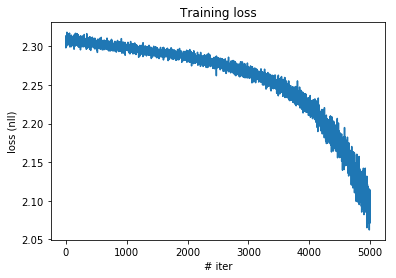

In [32]:
plt.plot(losses)
plt.xlabel("# iter")
plt.ylabel("loss (nll)")
plt.title("Training loss")
plt.show()

### Keep training

In [33]:
losses = losses + train(net, optimizer, data_generator, n_iter=5000, cuda=True, log_interval=300)

Train iter: [0/5000 (0%)]	Loss: 2.067363
Train iter: [300/5000 (6%)]	Loss: 2.002204
Train iter: [600/5000 (12%)]	Loss: 1.911748
Train iter: [900/5000 (18%)]	Loss: 1.788529
Train iter: [1200/5000 (24%)]	Loss: 1.679034
Train iter: [1500/5000 (30%)]	Loss: 1.538527
Train iter: [1800/5000 (36%)]	Loss: 1.394766
Train iter: [2100/5000 (42%)]	Loss: 1.438663
Train iter: [2400/5000 (48%)]	Loss: 1.318511
Train iter: [2700/5000 (54%)]	Loss: 1.158760
Train iter: [3000/5000 (60%)]	Loss: 1.118456
Train iter: [3300/5000 (66%)]	Loss: 1.167711
Train iter: [3600/5000 (72%)]	Loss: 1.098335
Train iter: [3900/5000 (78%)]	Loss: 1.118299
Train iter: [4200/5000 (84%)]	Loss: 1.030634
Train iter: [4500/5000 (90%)]	Loss: 0.903696
Train iter: [4800/5000 (96%)]	Loss: 0.957284


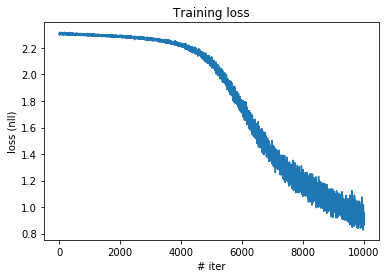

In [34]:
plt.plot(losses)
plt.xlabel("# iter")
plt.ylabel("loss (nll)")
plt.title("Training loss")
plt.show()

## Test the model

In [37]:
def predict(model, X, batch_size=512, cuda=True):
    predictions = []
    model.eval()
    with torch.no_grad():  # speed up computation but makes backward propagation impossible
        for X_batch in one_epoch(X, batch_size=batch_size):
            X_batch = torch.from_numpy(X_batch)
            if cuda:
                X_batch = X_batch.cuda()
            y_log_proba = model(X_batch)
            y_pred = y_log_proba.max(1, keepdim=True)[1]
            predictions.extend(y_pred.cpu().data.numpy())
    return np.array(predictions)


In [38]:
y_pred = predict(net, X_test)
print('accuracy : ', np.mean(y_pred.ravel() == y_test))

accuracy :  0.8514285714285714


# Summary

This is one iteration of the search to solve a problem with deep learning.
- Define some netowrk structure
- Setup training/testing data
- Run the gradient descent algorithm
- Analyse monitored information and the final performances

This loop is parametrized by many parameter:
- Optimizer choice (SGD, Nesterov, Adam, AdaGrad, etc)
- learning rate, learning rate momentum, cycle length, etc
- Neural network architecture
- minibatch size
- dropout probability
- etc

They are called **hyper-parameters** as opposed to **parameters** that usually refer to the parameters that are trained with gradient descent.

The next part will focus on the implementation of some hyper-parameter search.


# Hyper-parameter search

As stated in the previous section hyper-parameter search can be boiled down to a big loop gathering the model definition, training and evaluation.

In order to enable reproducible experiment it is necessary to have one fixed seed for every generator.
Some randomness may remain because float operation are not commutative or from multi-threaded operation.



In [39]:
RANDOM_SEED = 15081715  # your birthdate, 42, your phone number

torch.backends.cudnn.deterministic = True
torch.manual_seed(RANDOM_SEED)

## Evaluation

The critical part of hyper-parameter optimization is the evaluation of the performances of a given model.

Here the objective is to get the **highest accuracy** on the test set.

A good practice is to measure some average and variance of the performance according to data split and random initialization. This is achieved with cross-validation ie we execute the evaluation on different split of the data into a training and validation set and different random initialization.

Since we will use the validation data to choose some parameters of the model it is possible (very likely) that we overfit on the validation set. This is why it is absolutely necessary to **keep some data in the vault and never touch it until the very end !**.

In [40]:
X_dev = X[:-10000]
y_dev = y[:-10000]
X_test = X[-10000:]  # NEVER touch it again
y_test = y[-10000:]  # NEVER touch it again


Example of cross-validation split.
No need to reinvent the wheel. Use scikit-learn.

In [43]:
from sklearn.model_selection import ShuffleSplit

dummy_X_dev = np.arange(100)
dummy_y_dev = np.repeat(np.arange(10), 10)

cv_splitter = ShuffleSplit(n_splits=5, test_size=0.1, random_state=RANDOM_SEED)
cv_generator = cv_splitter.split(dummy_X_dev, dummy_y_dev)

for train_idx, valid_idx in cv_generator:
    X_train = dummy_X_dev[train_idx]
    X_valid = dummy_X_dev[valid_idx]
    y_train = dummy_y_dev[train_idx]
    y_valid = dummy_y_dev[valid_idx]
    # Do stuff
    

## Exercice 4 : Pimp my cross-validation

1. Make use of *train()* and *predict()* and the previous example to write *evaluation()* function that computes *mean* and *std* of the validation accuracy.
2. Improve the *train()* function to monitor validation loss after some *log_interval* (don't forget to switch the model between evaluation and training mode).
3. Improve the *evaluate()* function to save the trained models (use [state_dict methods](https://pytorch.org/tutorials/beginner/saving_loading_models.html)).
4. Improve the *train()* function to regularly save training model checkpoint. This is usefull to enable recovery from a crash on the cluster or on the cloud.



In [44]:
def evaluation_v1():
    pass  # TODO

In [45]:
# Try it

evaluation_v1()

In [46]:
def train_v2():
    pass # TODO

def evaluation_v2():
    pass  # TODO

In [47]:
# Try it

evaluation_v2()

In [48]:
def evaluation_v3():
    pass  # TODO

In [49]:
# Try it

evaluation_v3()

In [50]:
def train_v4():
    pass # TODO

def evaluation_v4():
    pass  # TODO

In [51]:
# Try it

evaluation_v4()

## Hyper parameter sampler

- Grid search vs random search vs fancy black box optimization


# GAN architechtures

GAN architechtures are quite pelicular, where the metric of the NN is also computed with a NN. 


![gan](gan.png)

This structure relies on a double-optimization game, where the discriminator learns to distinguish the true images from the false images, and the generator tries to fool the discriminator.

This game is implemented using two optimizers and the `.detach()` function, that blocks the retropropagation of the gradient. 


## Exercice 5: Implement a GAN on MNIST, using 1 convolutional layers, and batchnorms.

The general structure is the following:

1. Pass noise into generator to generate a batch of images 
2. Pass the generated batch and a true batch through discriminator
3. Apply a BCE on the true labels to train the discriminator (while applying `.detach()` on the generated batch)
4. Backpropagate the loss and apply the discriminator optimizer
5. Apply a BCE on the generated batch using fake labels (saying that they're real)
6. Backpropagate and apply the generator optimizer (don't forget to `.zero_grad()`the optimizers!).

# Final comments


- **Use Object programming** to write clean code
- Heavily **use code versionning** because it is very easy to break your model
    - "WTF ?! There is NaN values everywhere !"
    - "WTF ?! I changed the seed and now I lost 5% of accuracy !"
    - "WTF ?! I changed 1 neuron number and now there is crazy shape errors everywhere !"
    - "WTF ?! I changed the batchsize to make better use of the new GPU and now training don't converge !"
- Pytorch/Tensorflow/Keras are not very stable : **use docker** to help yourself and other people to use the code 
- Pytorch contains many other useful features :
    - [forward and backward hooks](https://pytorch.org/tutorials/beginner/former_torchies/nn_tutorial.html#forward-and-backward-function-hooks) to help monitoring of make crazy algorithm
    - multi threaded loader for big dataset
    - torchvision : almost everything you may want when handling images
    - 
- Do not use Jupyter-notebook for more than prototyping. Once you code is stable/clean enough write a module or a script.
